In [207]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

In [175]:
#importing dataset
b = yf.Ticker(input('Enter ticker name : '))
a = b.history(period="max")

Enter ticker name : AAPL


some ticker symbol

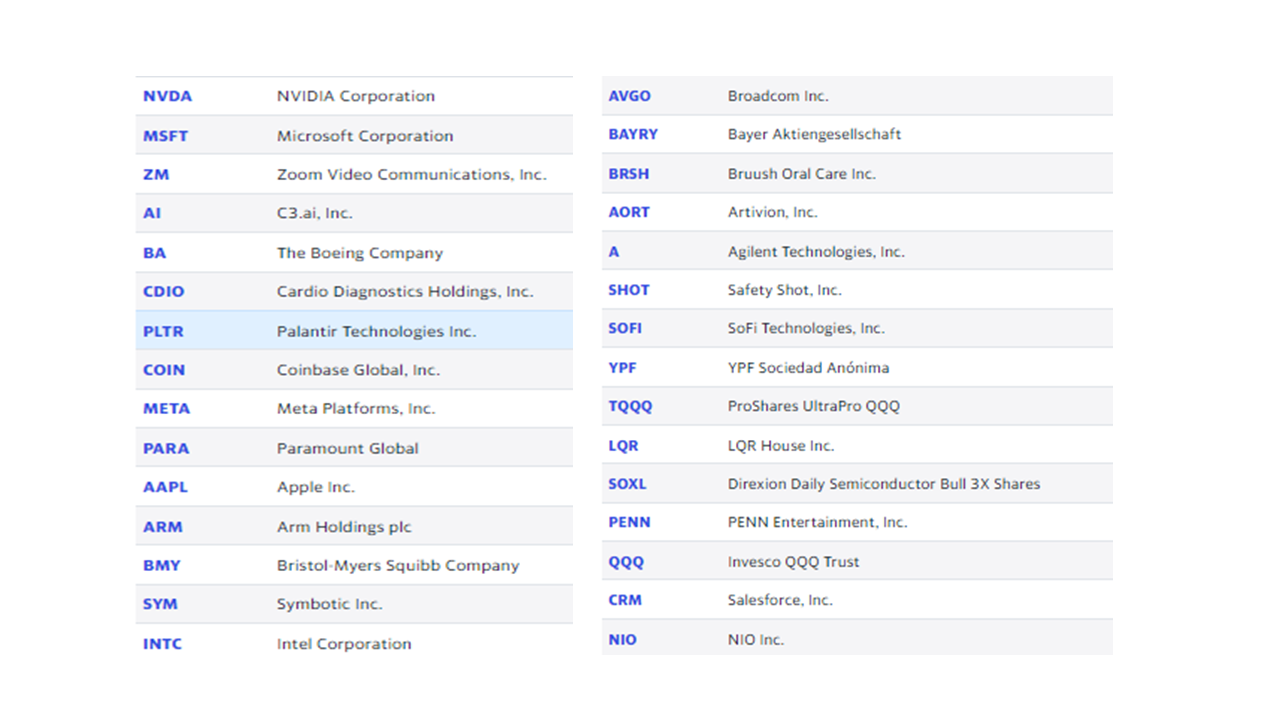

In [176]:
start_date = input("Enter start date  ")

data = a[(a.index >= start_date)]

# Print the filtered data
print(f"Data for the ticker number you gave" , b )
print(" ")
print(data)

Enter start date  2023-01-01
Data for the ticker number you gave yfinance.Ticker object <AAPL>
 
                                 Open        High         Low       Close  \
Date                                                                        
2023-01-03 00:00:00-05:00  129.555841  130.172390  123.479803  124.374802   
2023-01-04 00:00:00-05:00  126.184691  127.944857  124.384755  125.657639   
2023-01-05 00:00:00-05:00  126.423361  127.059803  124.066539  124.325089   
2023-01-06 00:00:00-05:00  125.309594  129.565795  124.195816  128.899521   
2023-01-09 00:00:00-05:00  129.744788  132.668449  129.168010  129.426559   
...                               ...         ...         ...         ...   
2023-11-14 00:00:00-05:00  187.699997  188.110001  186.300003  187.440002   
2023-11-15 00:00:00-05:00  187.850006  189.500000  187.779999  188.009995   
2023-11-16 00:00:00-05:00  189.570007  190.960007  188.649994  189.710007   
2023-11-17 00:00:00-05:00  190.250000  190.380005  188.5

In [177]:
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,129.555841,130.172390,123.479803,124.374802,112117500,0.0,0.0
2023-01-04 00:00:00-05:00,126.184691,127.944857,124.384755,125.657639,89113600,0.0,0.0
2023-01-05 00:00:00-05:00,126.423361,127.059803,124.066539,124.325089,80962700,0.0,0.0
2023-01-06 00:00:00-05:00,125.309594,129.565795,124.195816,128.899521,87754700,0.0,0.0
2023-01-09 00:00:00-05:00,129.744788,132.668449,129.168010,129.426559,70790800,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,187.699997,188.110001,186.300003,187.440002,60108400,0.0,0.0
2023-11-15 00:00:00-05:00,187.850006,189.500000,187.779999,188.009995,53790500,0.0,0.0
2023-11-16 00:00:00-05:00,189.570007,190.960007,188.649994,189.710007,54412900,0.0,0.0


In [178]:
print (df.columns.tolist())


['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']


In [179]:
df.index

DatetimeIndex(['2023-01-03 00:00:00-05:00', '2023-01-04 00:00:00-05:00',
               '2023-01-05 00:00:00-05:00', '2023-01-06 00:00:00-05:00',
               '2023-01-09 00:00:00-05:00', '2023-01-10 00:00:00-05:00',
               '2023-01-11 00:00:00-05:00', '2023-01-12 00:00:00-05:00',
               '2023-01-13 00:00:00-05:00', '2023-01-17 00:00:00-05:00',
               ...
               '2023-11-07 00:00:00-05:00', '2023-11-08 00:00:00-05:00',
               '2023-11-09 00:00:00-05:00', '2023-11-10 00:00:00-05:00',
               '2023-11-13 00:00:00-05:00', '2023-11-14 00:00:00-05:00',
               '2023-11-15 00:00:00-05:00', '2023-11-16 00:00:00-05:00',
               '2023-11-17 00:00:00-05:00', '2023-11-20 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=223, freq=None)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223 entries, 2023-01-03 00:00:00-05:00 to 2023-11-20 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          223 non-null    float64
 1   High          223 non-null    float64
 2   Low           223 non-null    float64
 3   Close         223 non-null    float64
 4   Volume        223 non-null    int64  
 5   Dividends     223 non-null    float64
 6   Stock Splits  223 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 13.9 KB


 Data Cleaning

In [181]:
# Dropping the 'Stock Splits' column
df = df.drop('Stock Splits', axis=1)

In [182]:
print (df.columns.tolist())


['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']


here we have removed stock splits column as we don't need it in our prediction process,
rest all data is clean

Data Visualization

In [183]:
weekly_data = df.resample('W').agg({'Open': 'mean',
                                      'High': 'mean',
                                      'Low': 'mean',
                                      'Close': 'mean',
                                      'Volume': 'mean'})

In [184]:
weekly_data

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-08 00:00:00-05:00,126.868372,128.685711,124.031728,125.814262,92487125.0
2023-01-15 00:00:00-05:00,130.846627,132.730097,129.589655,131.771457,66667040.0
2023-01-22 00:00:00-05:00,134.500713,136.777981,133.541076,135.316154,67955850.0
2023-01-29 00:00:00-05:00,140.345530,143.277144,139.617598,142.282703,67731120.0
2023-02-05 00:00:00-05:00,144.902061,148.183718,143.686857,146.787521,96049940.0
2023-02-12 00:00:00-05:00,151.266144,152.907541,149.655072,151.236774,66151760.0
2023-02-19 00:00:00-05:00,151.792256,153.947515,151.158830,153.106927,63358480.0
2023-02-26 00:00:00-05:00,148.465254,149.090221,146.538078,147.775555,53435575.0
2023-03-05 00:00:00-05:00,146.208906,148.059398,145.513722,146.920020,54798980.0


In [185]:
df.shape

(223, 6)

In [186]:
df.describe()


,Open,High,Low,Close,Volume,Dividends
count,223.000000,223.000000,223.000000,223.000000,2.230000e+02,223.000000
mean,169.233410,170.900556,167.966480,169.563577,6.039868e+07,0.004260
std,16.970402,16.756814,16.979001,16.792287,1.726124e+07,0.031598
min,125.309594,127.059803,123.479803,124.325089,3.145820e+07,0.000000
25%,158.203251,159.906341,157.107699,157.964218,4.936340e+07,0.000000
50%,172.858538,174.244843,171.474431,173.521393,5.600710e+07,0.000000
75%,180.667685,182.150024,178.758618,180.475220,6.609815e+07,0.000000
max,195.717515,197.702207,194.760064,195.926956,1.543573e+08,0.240000


In [187]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends'], dtype='object')

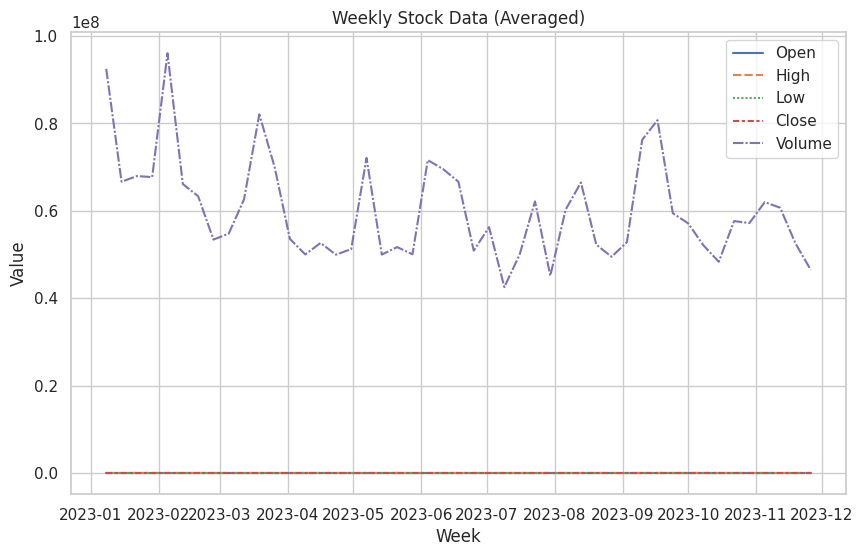

In [188]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_data)
plt.xlabel('Week')
plt.ylabel('Value')
plt.title('Weekly Stock Data (Averaged)')
plt.show()

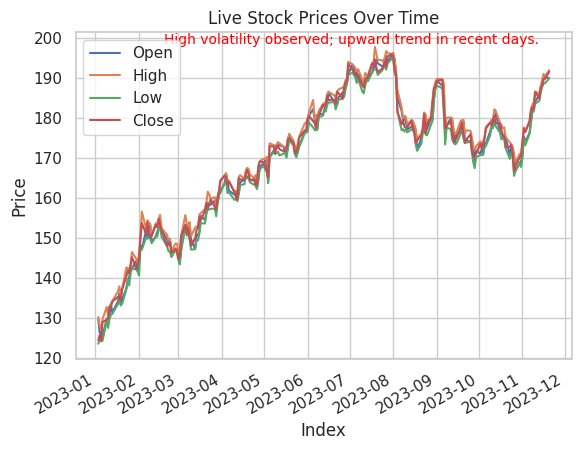

In [189]:
df[ ['Open', 'High', 'Low', 'Close']].plot()
plt.title('Live Stock Prices Over Time')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
conclusion = "High volatility observed; upward trend in recent days."
plt.text(df.index[-6], df['High'].max(), conclusion, ha='right', va='bottom', fontsize=10, color='red')
plt.show()

here the above  graph shows the trend of your stock with a ordered period of gap

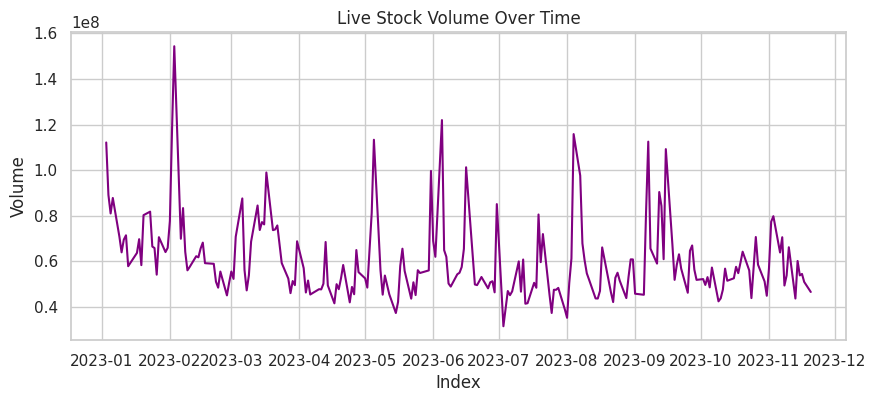

In [190]:
#volume
plt.figure(figsize=(10, 4))
plt.plot(df['Volume'], color='purple')
plt.title('Live Stock Volume Over Time')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.show()

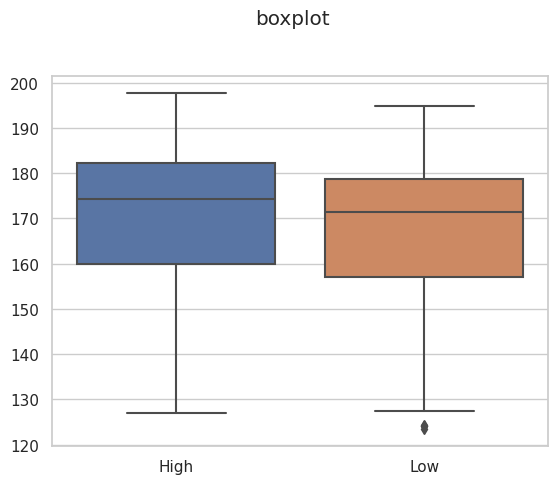

In [191]:
sns.boxplot(df[['High', 'Low']])
plt.suptitle('boxplot', y=1.02)
plt.show()

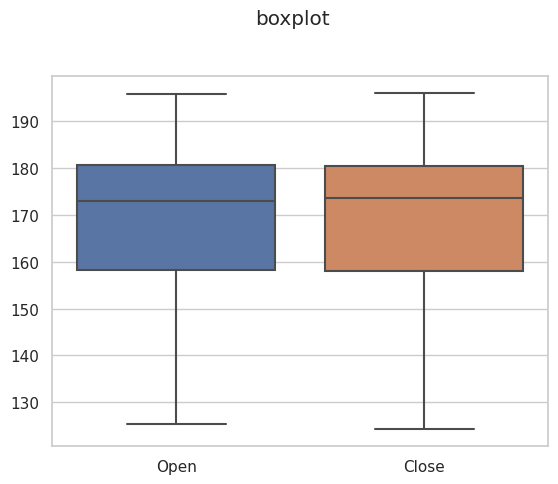

In [192]:
sns.boxplot(df[['Open', 'Close']])
plt.suptitle('boxplot', y=1.02)
plt.show()

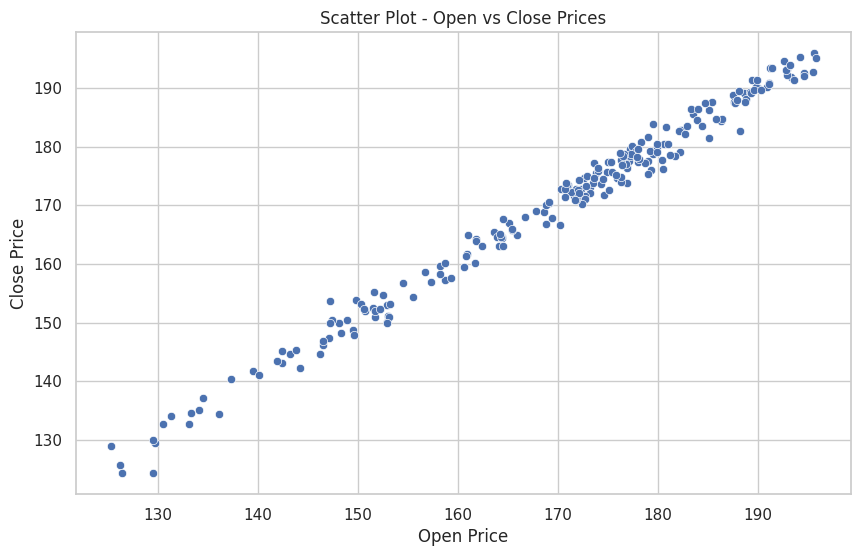

In [193]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Scatter Plot - Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

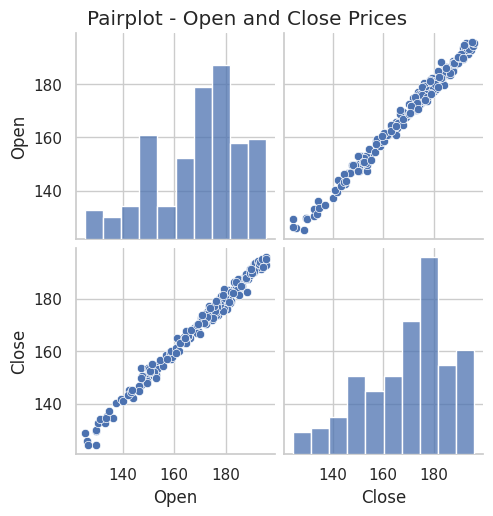

In [194]:
sns.pairplot(df[['Open', 'Close']])
plt.suptitle('Pairplot - Open and Close Prices', y=1.02)
plt.show()

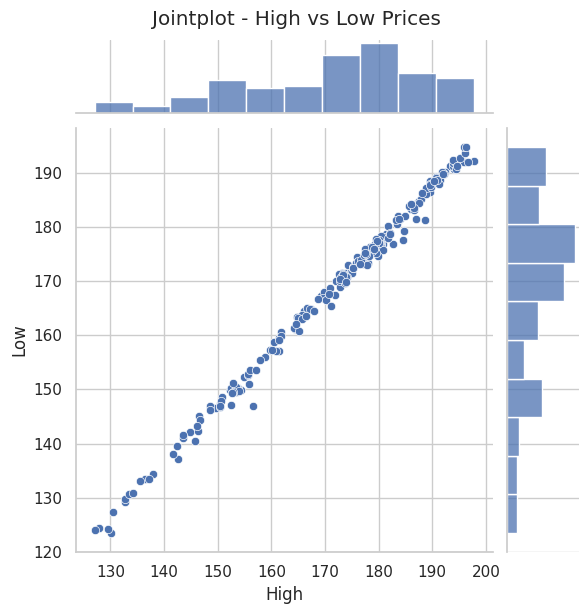

In [195]:
sns.jointplot(x='High', y='Low', data=df, kind='scatter')
plt.suptitle('Jointplot - High vs Low Prices', y=1.02)
plt.show()

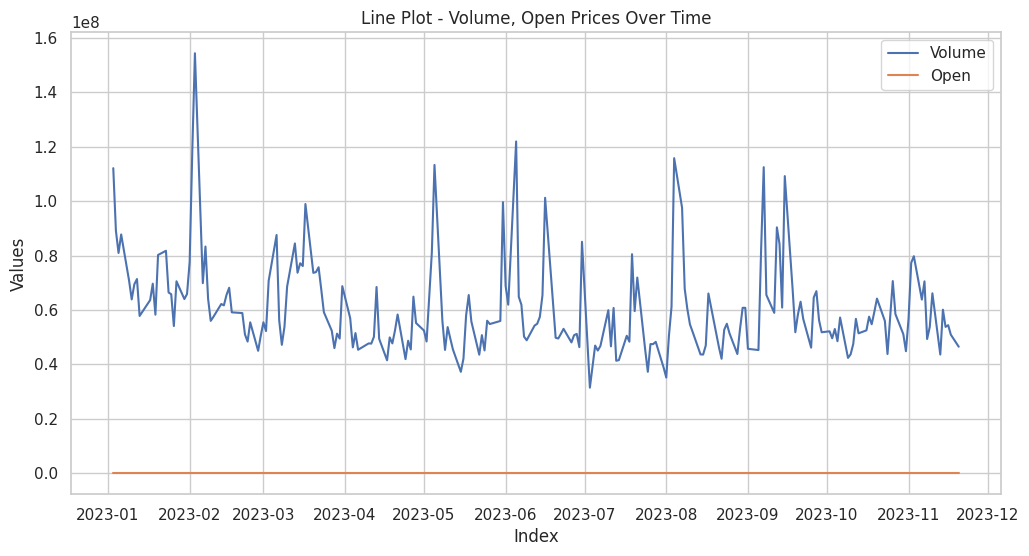

In [196]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Volume', data=df, label='Volume')
sns.lineplot(x=df.index, y='Open', data=df, label='Open')
# sns.lineplot(x=df.index, y='Close', data=df, label='Close')
plt.title('Line Plot - Volume, Open Prices Over Time')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

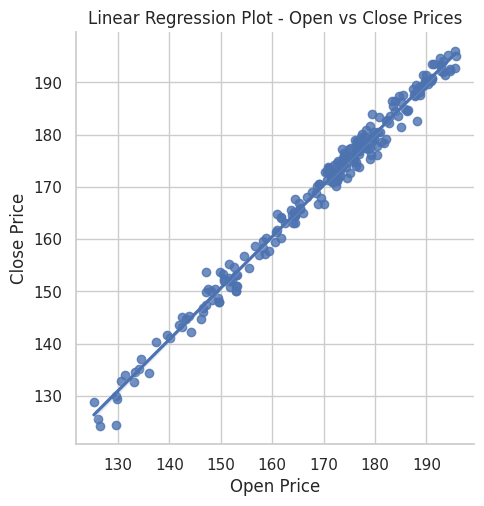

In [197]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Open', y='Close', data=df)
plt.title('Linear Regression Plot - Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

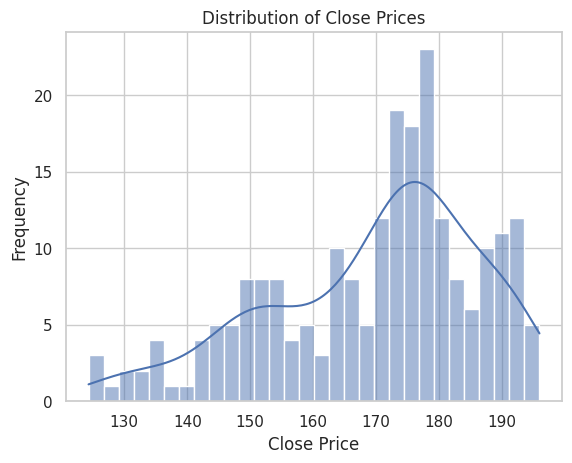

In [198]:
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

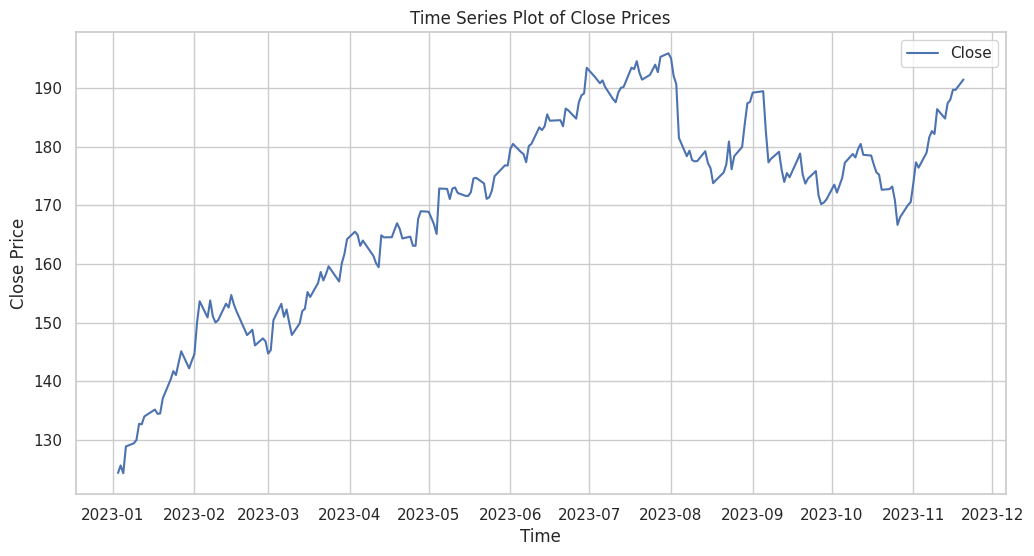

In [199]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Close', data=df, label='Close')
plt.title('Time Series Plot of Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

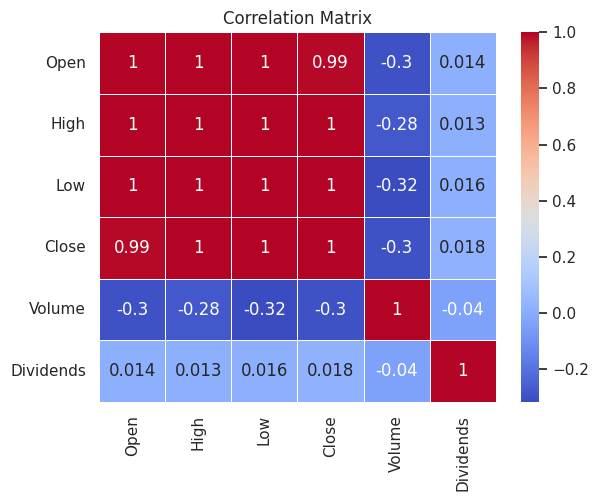

In [200]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Predicting whether to buy or sell the choosen stock using Linear Regression Model

In [201]:
df['Next_day_Open'] = df['Open'].shift(-1)
# Drop the last row as it will have NaN for 'Next_day_Open'
df = df.dropna()

In [202]:
X = df[['Open']]  # Features
y = df['Next_day_Open']  # Target
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [203]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [209]:
y_pred = model.predict(X_test)

In [204]:
a = X_test.iloc[[-1]]

In [205]:
predicted_next_open = model.predict(a)

In [206]:
# Compare predicted open with actual open
for i in range(len(predicted_next_open)):
    if predicted_next_open[i] > X_test.iloc[i]['Open']:
        print(f"Buy the stock, as the price is",predicted_next_open)
    else:
        print(f"Sell the stock or stay out, as the price is", predicted_next_open)

Buy the stock, as the price is [192.94131952]


Evaluation of Model

In [210]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(mse)
print(mae)
print(r2)
print(rmse)

3.5149629488711267
1.4329737541841263
0.9851003364913619
1.8748234447198293


Accuracy of model

In [211]:
model.score(X_test,y_pred)

1.0